<a href="https://colab.research.google.com/github/Micherojas/TelecomX_challenge/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

datos = pd.read_json(url)

In [ ]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##Normalizacion


In [ ]:
# Detectar columnas con diccionarios y normalizarlas
for col in datos.columns:
    if isinstance(datos[col].iloc[0], dict):
        # Expandir la columna que tiene diccionario en varias columnas
        nuevas_columnas = datos[col].apply(pd.Series)

        # Renombrar las nuevas columnas para que tengan prefijo del nombre original
        nuevas_columnas.columns = [f"{col}_{subcol}" for subcol in nuevas_columnas.columns]

        # Unir al DataFrame original y eliminar la columna original
        datos = pd.concat([datos.drop(columns=[col]), nuevas_columnas], axis=1)

In [ ]:
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [ ]:
datos.shape

(7267, 20)

#🔧 Transformación

##Diccionario



customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea


TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

##Conoce el conjunto de datos


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customerID                 7267 non-null   object
 1   Churn                      7267 non-null   object
 2   customer_gender            7267 non-null   object
 3   customer_SeniorCitizen     7267 non-null   int64 
 4   customer_Partner           7267 non-null   object
 5   customer_Dependents        7267 non-null   object
 6   customer_tenure            7267 non-null   int64 
 7   phone_PhoneService         7267 non-null   object
 8   phone_MultipleLines        7267 non-null   object
 9   internet_InternetService   7267 non-null   object
 10  internet_OnlineSecurity    7267 non-null   object
 11  internet_OnlineBackup      7267 non-null   object
 12  internet_DeviceProtection  7267 non-null   object
 13  internet_TechSupport       7267 non-null   object
 14  internet

In [ ]:
datos.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges'],
      dtype='object')

In [ ]:
datos.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


##Comprobación de incoherencias en los datos


In [ ]:
pd.unique(datos['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [ ]:
datos[datos.isnull().any(axis=1)]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges


In [ ]:
datos.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [ ]:
datos.columns.value_counts()

,count
customerID,1
Churn,1
customer_gender,1
customer_SeniorCitizen,1
customer_Partner,1
customer_Dependents,1
customer_tenure,1
phone_PhoneService,1
phone_MultipleLines,1
internet_InternetService,1


##Manejo de inconsistencias


In [ ]:
datos.columns.str.lower()

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod', 'account_charges'],
      dtype='object')

In [ ]:
datos= datos.rename(columns=str.lower)

In [ ]:
datos.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


##Columna de cuentas diarias


In [ ]:
# 1. Expandir la columna con diccionarios en varias columnas
df_charges = datos['account_charges'].apply(pd.Series)

# 2. Renombrar columnas para evitar problemas
df_charges.columns = ['Monthly', 'Total']

# 3. Unir al DataFrame original y eliminar la columna original
datos = pd.concat([datos.drop(columns=['account_charges']), df_charges], axis=1)

# 4. Convertir ambas a numéricas (por si hay texto o comillas)
datos['Monthly'] = pd.to_numeric(datos['Monthly'], errors='coerce')
datos['Total'] = pd.to_numeric(datos['Total'], errors='coerce')

# 5. Calcular Cuentas_Diarias
datos['Cuentas_Diarias'] = datos['Monthly'] / 30

# 6. Revisar
print(datos[['Monthly', 'Total', 'Cuentas_Diarias']].head())

   Monthly    Total  Cuentas_Diarias
0     65.6   593.30         2.186667
1     59.9   542.40         1.996667
2     73.9   280.85         2.463333
3     98.0  1237.85         3.266667
4     83.9   267.40         2.796667


In [ ]:
datos.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

#📊 Carga y análisis

In [ ]:
datos.describe()

,customer_seniorcitizen,customer_tenure,Monthly,Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [ ]:
import matplotlib.pyplot as plt

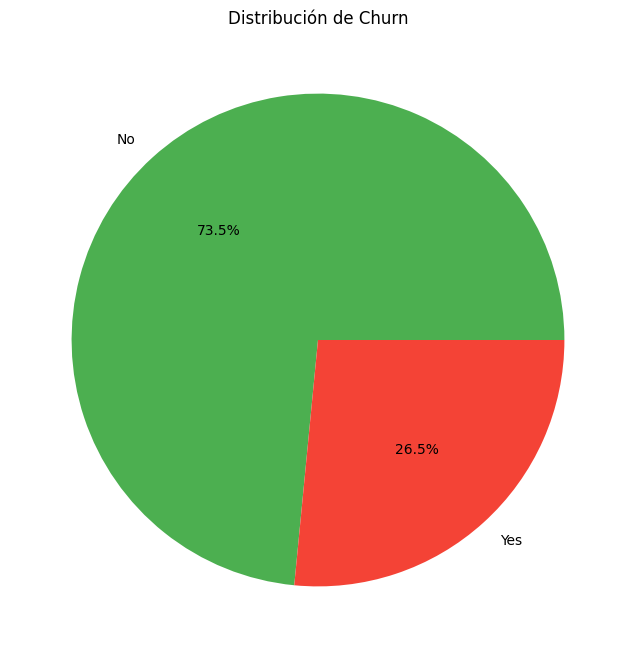

In [ ]:
# Filter out rows where 'churn' is an empty string
filtered_churn_data = datos[datos['churn'] != '']['churn'].value_counts()

plt.figure(figsize=(8, 8)) # Increased figure size
plt.pie(filtered_churn_data, labels=filtered_churn_data.index, autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
plt.title('Distribución de Churn')
plt.show()

In [ ]:
datos['churn'].value_counts()

,count
churn,
No,5174
Yes,1869
,224


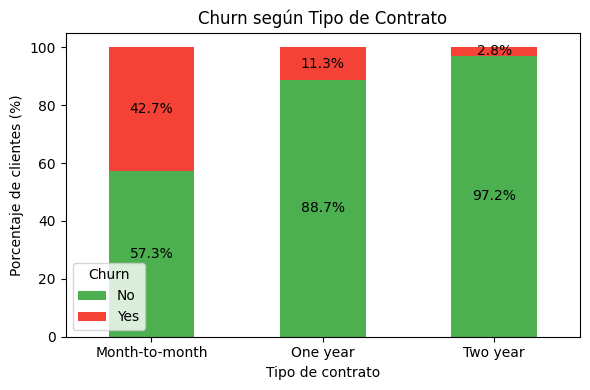

In [ ]:
# Filter out rows where 'churn' is an empty string
filtered_datos = datos[datos['churn'] != '']

tabla = pd.crosstab(filtered_datos['account_contract'], filtered_datos['churn'], normalize='index') * 100
ax = tabla.plot(
    kind='bar', stacked=True,
    color=['#4CAF50', '#F44336'],
    figsize=(6, 4)
)
plt.title('Churn según Tipo de Contrato')
plt.ylabel('Porcentaje de clientes (%)')
plt.xlabel('Tipo de contrato')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

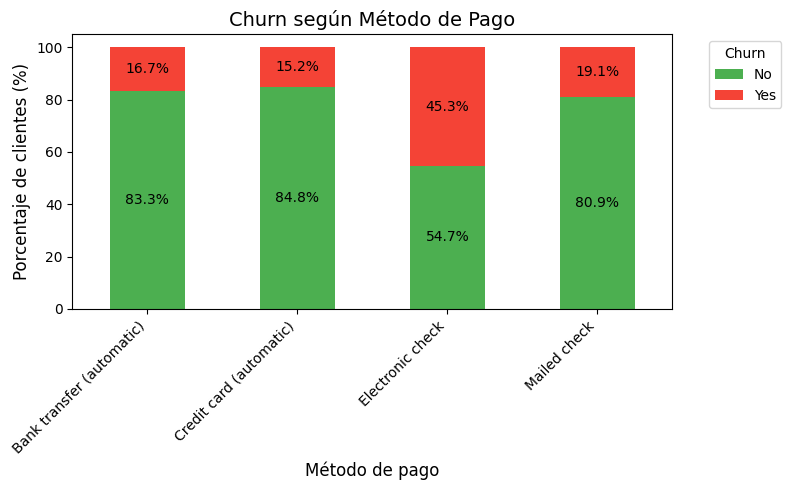

In [ ]:
# Filter out rows where 'churn' is an empty string
filtered_datos = datos[datos['churn'] != '']

tabla = pd.crosstab(filtered_datos['account_paymentmethod'], filtered_datos['churn'], normalize='index') * 100
ax = tabla.plot(
    kind='bar', stacked=True,
    color=['#4CAF50', '#F44336'],
    figsize=(8, 5)  # Increased figure size
)
plt.title('Churn según Método de Pago', fontsize=14)  # Increased title font size
plt.ylabel('Porcentaje de clientes (%)', fontsize=12)  # Increased label font size
plt.xlabel('Método de pago', fontsize=12)  # Increased label font size
plt.legend(title='Churn', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')  # Moved legend

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

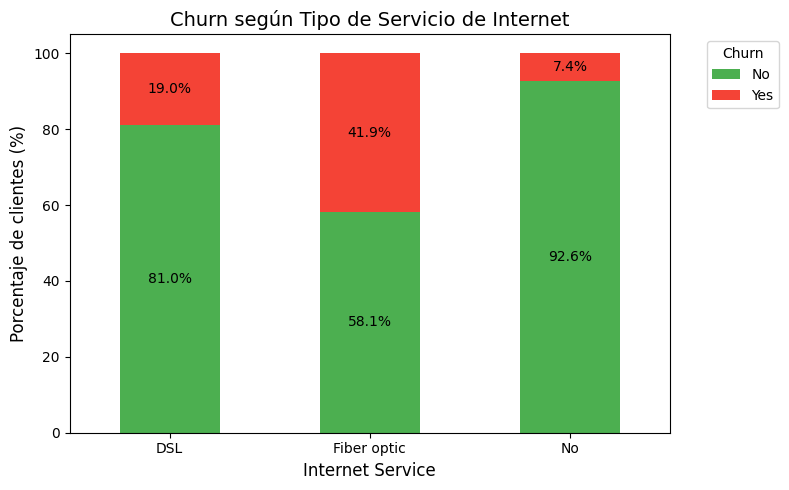

In [ ]:
# Filter out rows where 'churn' is an empty string
filtered_datos = datos[datos['churn'] != '']

tabla = pd.crosstab(filtered_datos['internet_internetservice'], filtered_datos['churn'], normalize='index') * 100
ax = tabla.plot(
    kind='bar', stacked=True,
    color=['#4CAF50', '#F44336'], # Using green and red for No and Yes churn
    figsize=(8, 5)
)
plt.title('Churn según Tipo de Servicio de Internet', fontsize=14)
plt.ylabel('Porcentaje de clientes (%)', fontsize=12)
plt.xlabel('Internet Service', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

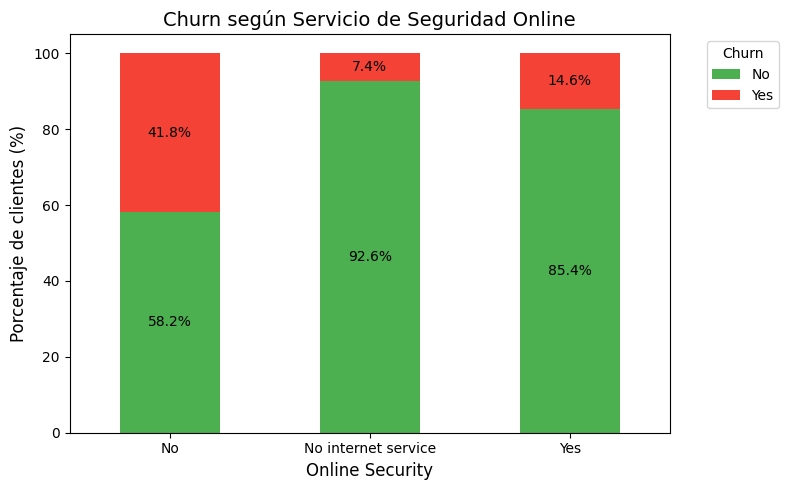

In [ ]:
# Filter out rows where 'churn' is an empty string
filtered_datos = datos[datos['churn'] != '']

tabla = pd.crosstab(filtered_datos['internet_onlinesecurity'], filtered_datos['churn'], normalize='index') * 100
ax = tabla.plot(
    kind='bar', stacked=True,
    color=['#4CAF50', '#F44336'], # Using a different color scheme with only two colors
    figsize=(8, 5) # Increased figure size
)
plt.title('Churn según Servicio de Seguridad Online', fontsize=14) # Increased title font size
plt.ylabel('Porcentaje de clientes (%)', fontsize=12) # Increased label font size
plt.xlabel('Online Security', fontsize=12) # Increased label font size
plt.legend(title='Churn', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left') # Updated legend labels

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

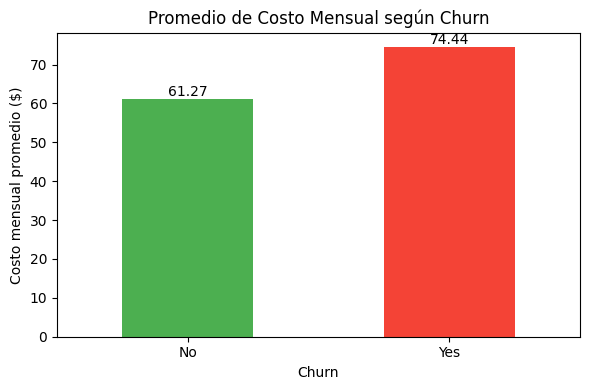

In [ ]:
# Filter out rows where 'churn' is an empty string
filtered_datos = datos[datos['churn'] != '']

plt.figure(figsize=(6,4))
ax = filtered_datos.groupby('churn')['Monthly'].mean().plot(
    kind='bar',
    color=['#4CAF50', '#F44336']
)
plt.title('Promedio de Costo Mensual según Churn')
plt.ylabel('Costo mensual promedio ($)')
plt.xlabel('Churn')
plt.xticks(rotation=0)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

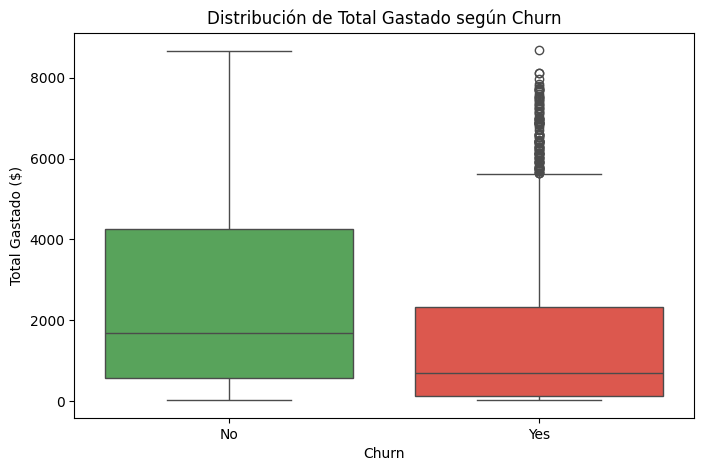

In [ ]:
# Filter out rows where 'churn' is an empty string
filtered_datos = datos[datos['churn'] != '']

# Boxplot for Total gastado
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='Total', data=filtered_datos, palette=['#4CAF50', '#F44336'], hue='churn', legend=False)
plt.title('Distribución de Total Gastado según Churn')
plt.xlabel('Churn')
plt.ylabel('Total Gastado ($)')
plt.show()

#📄Informe final

# Informe de Análisis de Churn de Clientes

## Introducción

El objetivo de este análisis es explorar y comprender los factores que contribuyen a la evasión de clientes (Churn) en la empresa TelecomX. La evasión de clientes es un problema crítico para las empresas de telecomunicaciones, ya que retener a los clientes existentes suele ser más rentable que adquirir nuevos. Al identificar los patrones y las razones detrás del churn, podemos desarrollar estrategias efectivas para reducirlo y mejorar la satisfacción del cliente.

## Limpieza y Tratamiento de Datos

El análisis comenzó cargando los datos desde un archivo JSON. Se identificaron y normalizaron las columnas que contenían diccionarios anidados, expandiéndolos en columnas separadas para facilitar el análisis. Se renombraron las columnas a minúsculas para consistencia.

La columna 'account_charges' que contenía diccionarios con cargos mensuales y totales fue expandida en dos columnas numéricas separadas: 'Monthly' y 'Total'. Se calculó una nueva columna, 'Cuentas_Diarias', dividiendo el cargo mensual por 30.

Durante la exploración inicial, se detectaron valores vacíos en la columna 'churn'. Estos valores se filtraron en las visualizaciones para asegurar la precisión de los análisis. Se verificó la ausencia de valores nulos en otras columnas relevantes para el análisis.

## Análisis Exploratorio de Datos

Se realizaron varios análisis exploratorios para comprender la distribución del churn y su relación con diferentes características de los clientes y servicios:

*   **Distribución de Churn:** Se visualizó la proporción de clientes que han evadido (Churn 'Yes') frente a los que no (Churn 'No') utilizando un gráfico de pastel. Aproximadamente el 26.5% de los clientes en el conjunto de datos han evadido.

*   **Churn según Tipo de Contrato:** Un gráfico de barras apiladas mostró que los clientes con contratos mes a mes tienen una tasa de churn significativamente más alta (42.7%) en comparación con aquellos con contratos de uno o dos años (11.3% y 2.8% respectivamente). Esto sugiere que los contratos a más largo plazo están asociados con una menor probabilidad de churn.

*   **Churn según Método de Pago:** Se analizó la relación entre el método de pago y el churn utilizando un gráfico de barras apiladas. Los clientes que utilizan el "Electronic check" tienen la tasa de churn más alta (45.3%), mientras que aquellos que usan "Bank transfer (automatic)" y "Credit card (automatic)" tienen tasas de churn más bajas (16.7% y 15.2% respectivamente). Esto podría indicar problemas con el método de pago electrónico o que los clientes que lo utilizan son menos leales.

*   **Churn según Tipo de Servicio de Internet:** Un gráfico de barras apiladas reveló que los clientes con servicio de "Fiber optic" tienen una tasa de churn considerablemente mayor (41.9%) en comparación con los clientes con servicio DSL (19.0%) o sin servicio de internet (7.4%). Esto podría sugerir problemas de calidad o precio con el servicio de fibra óptica.

*   **Churn según Servicio de Seguridad Online:** Se examinó la relación entre el servicio de seguridad online y el churn con un gráfico de barras apiladas. Los clientes que no tienen el servicio de seguridad online tienen una tasa de churn mucho más alta (41.8%) que aquellos que sí lo tienen (14.6%) o que no tienen servicio de internet (7.4%). Esto destaca la importancia de los servicios de seguridad adicionales para la retención de clientes.

*   **Promedio de Costo Mensual según Churn:** Un gráfico de barras mostró que el costo mensual promedio para los clientes que evadieron ($74.44) es más alto que para los clientes que no evadieron ($61.27). Esto podría indicar que los clientes que pagan más son más propensos a irse.

*   **Distribución de Total Gastado según Churn:** Un boxplot comparó la distribución del total gastado entre los clientes que evadieron y los que no. Se observa que los clientes que no evadieron tienden a tener un total gastado mayor y una distribución más amplia, mientras que los clientes que evadieron tienen un total gastado generalmente menor. Esto refuerza la idea de que los clientes de mayor valor son menos propensos a evadir.

## Conclusiones e Insights

Los análisis exploratorios han revelado varios insights clave sobre el churn de clientes en TelecomX:

*   La tasa de churn es significativa, lo que subraya la necesidad de estrategias de retención.
*   Los clientes con contratos a corto plazo (mes a mes) y aquellos que utilizan métodos de pago electrónicos tienen un mayor riesgo de evasión.
*   El tipo de servicio de internet, especialmente la fibra óptica, parece estar asociado con una mayor tasa de churn.
*   Los servicios de seguridad online adicionales son importantes para la retención de clientes.
*   Los clientes que gastan más mensualmente y en total son menos propensos a evadir.

Estos hallazgos sugieren que el churn no es un fenómeno aleatorio, sino que está relacionado con características específicas del cliente, el tipo de contrato, los servicios contratados y los métodos de pago.

## Recomendaciones

Basado en los hallazgos de este análisis, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

*   **Programas de Retención para Clientes con Contratos Mes a Mes:** Implementar programas de fidelización o incentivos para alentar a los clientes con contratos mes a mes a cambiarse a contratos de mayor duración.
*   **Optimización del Método de Pago Electrónico:** Investigar las posibles razones detrás de la alta tasa de churn asociada con el método de pago electrónico. Podría haber problemas de usabilidad, seguridad o tarifas que necesiten ser abordados.
*   **Mejora del Servicio de Fibra Óptica:** Analizar la calidad y el rendimiento del servicio de fibra óptica. Si hay problemas técnicos o de atención al cliente, abordarlos de inmediato. Considerar ofrecer incentivos adicionales para los clientes de fibra óptica.
*   **Promoción de Servicios de Seguridad Online:** Aumentar la conciencia sobre la importancia de los servicios de seguridad online y ofrecer promociones o paquetes atractivos para fomentar su adopción, especialmente entre los nuevos clientes.
*   **Programas de Valoración para Clientes de Alto Gasto:** Reconocer y recompensar a los clientes de alto gasto para fortalecer su lealtad y reducir su probabilidad de churn. Esto podría incluir ofertas exclusivas, atención al cliente prioritaria o programas de puntos.
*   **Análisis Adicional y Modelado Predictivo:** Continuar explorando la relación entre otras características (como la tenencia, la edad, los dependientes) y el churn. Considerar la construcción de un modelo predictivo de churn para identificar a los clientes en riesgo y tomar medidas proactivas de retención.